continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

0. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


1. Using lemonade.csv dataset and focusing on continuous variables:
    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
    - Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?


3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columsn from lemonade.csv

In [1]:
import pandas as pd
import numpy as np

#### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [13]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    q1 = np.quantile(series, .25)
    q3 = np.quantile(series, .75)
    iqr = q3 - q1 
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    return upper_bound, lower_bound

#### Using lemonade.csv dataset and focusing on continuous variables:

In [8]:
df = pd.read_csv("lemonade.csv")

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


> Why is this dataset called lemonade? 

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    

In [63]:
print("Lower bounds:\n")
for col in df.select_dtypes(np.number):
    print("The lower bound for {} is {}".format(col, get_lower_and_upper_bounds(df[col])[1]))
    print("The outliers:")
    for value in df[col]:
        if value <= get_lower_and_upper_bounds(df[col])[1]:
            print(value)
    print()

Lower bounds:

The lower bound for Temperature is 16.700000000000003
The outliers:
15.1

The lower bound for Rainfall is 0.26
The outliers:

The lower bound for Flyers is 4.0
The outliers:
-38

The lower bound for Price is 0.5
The outliers:
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5

> Temperature: This looks like a reasonable fluctuation. Keep

> Rainfall: No lower bound outliers

> Flyers: The outlier is a negative value. Remove
    
> Price: The outlier of 0.5 is many and on the bounds. Keep
    
> Sales: No lower bound outliers    

#### Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [62]:
print("Upper bounds:\n")
for col in df.select_dtypes(np.number):
    print("The upper bound for {} is {}".format(col, get_lower_and_upper_bounds(df[col])[0]))
    print("The outliers:")
    for value in df[col]:
        if value >= get_lower_and_upper_bounds(df[col])[0]:
            print(value)
    print()

Upper bounds:

The upper bound for Temperature is 104.7
The outliers:
212.0

The upper bound for Rainfall is 1.3
The outliers:
2.0
1.33
1.33
1.54
1.54
1.54
1.33
1.33
1.67
1.43
1.43
1.54
1.33
1.33
1.54
1.82
1.43
1.82
1.33
1.43
1.54
1.33
1.43
1.33
1.54
1.43
1.43
2.5

The upper bound for Flyers is 76.0
The outliers:
77
76
80
76

The upper bound for Price is 0.5
The outliers:
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0

> Temperature: A temperature of 212 seems unreasonable. Remove

> Rainfall: The outliers seem reasonably close to the upper bound. Keep

> Flyers: Very close to upper bound. Keep

> Price: All the values of price are the same. Remove entire row

> Sales: Very high outliers, but obtainable in sale. Keep

#### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [61]:
print("Lower bounds:\n")
for col in df.select_dtypes(np.number):
    print("The lower bound for {} is {}".format(col, get_lower_and_upper_bounds(df[col],3)[1]))
    print("The outliers:")
    for value in df[col]:
        if value <= get_lower_and_upper_bounds(df[col],3)[1]:
            print(value)
    print()

Lower bounds:

The lower bound for Temperature is -16.299999999999997
The outliers:

The lower bound for Rainfall is -0.13
The outliers:

The lower bound for Flyers is -23.0
The outliers:
-38

The lower bound for Price is 0.5
The outliers:
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


#### Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [64]:
print("Upper bounds:\n")
for col in df.select_dtypes(np.number):
    print("The upper bound for {} is {}".format(col, get_lower_and_upper_bounds(df[col],3)[0]))
    print("The outliers:")
    for value in df[col]:
        if value >= get_lower_and_upper_bounds(df[col],3)[0]:
            print(value)
    print()

Upper bounds:

The upper bound for Temperature is 137.7
The outliers:
212.0

The upper bound for Rainfall is 1.69
The outliers:
2.0
1.82
1.82
2.5

The upper bound for Flyers is 103.0
The outliers:

The upper bound for Price is 0.5
The outliers:
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5

#### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

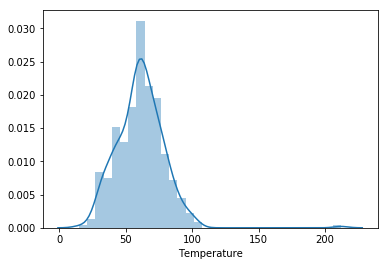

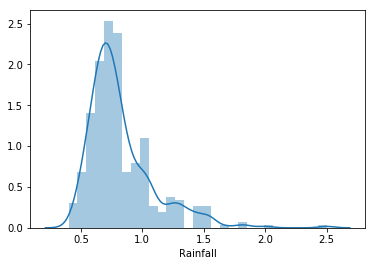

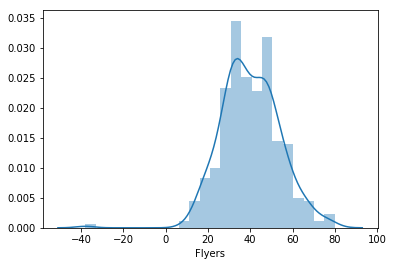

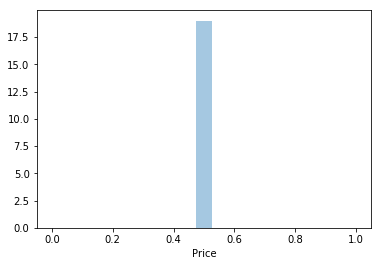

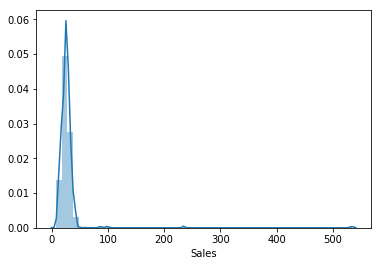

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for col in df.select_dtypes(np.number):
    sns.distplot(df[col])
    plt.show()

In [76]:
normal_col = ["Temperature", "Flyers", "Sales"]

#### Use a 2 sigma decision rule to isolate the outliers. Do these make sense? Should certain outliers be kept or removed?

- 95% of observations are within 2 standard deviations of the mean

In [88]:
for col in normal_col:
    print(col, "Outliers")
    print(df[col] [df[col] > np.percentile(df[col],95)])
    print(df[col] [df[col] < np.percentile(df[col],5)])
    print()

Temperature Outliers
41     212.0
154     90.4
158     90.7
162     93.0
166     99.3
171     94.3
176    102.6
180     89.4
181    102.9
182     93.4
185     93.0
186     91.7
190     98.0
194     92.0
198     99.3
202     99.6
203     89.1
207     97.9
208     87.4
Name: Temperature, dtype: float64
0      27.0
1      28.9
5      25.3
15     30.6
16     32.2
19     31.6
23     28.6
24     32.2
338    22.0
342    31.2
343    31.3
346    32.2
347    31.9
350    32.2
351    30.9
355    30.9
359    28.9
363    30.9
364    15.1
Name: Temperature, dtype: float64

Flyers Outliers
162    67
163    65
166    77
169    66
170    70
171    76
178    65
182    68
183    68
190    66
194    80
198    76
203    72
204    69
207    74
216    66
Name: Flyers, dtype: int64
0      15
1      15
11     16
20     16
25     18
27     15
324   -38
337    16
338    11
343    15
350    16
355    17
362    17
364     9
Name: Flyers, dtype: int64

Sales Outliers
158     39
162     40
166     41
171     41
176  

#### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv
- 99.7% of observations are within 3 standard deviations of the mean 

In [89]:
for col in normal_col:
    print(col, "Outliers")
    print(df[col] [df[col] > np.percentile(df[col],99.7)])
    print(df[col] [df[col] < np.percentile(df[col],.3)])
    print()

Temperature Outliers
41     212.0
181    102.9
Name: Temperature, dtype: float64
338    22.0
364    15.1
Name: Temperature, dtype: float64

Flyers Outliers
166    77
194    80
Name: Flyers, dtype: int64
324   -38
364     9
Name: Flyers, dtype: int64

Sales Outliers
183    235
184    534
Name: Sales, dtype: int64
364    7
Name: Sales, dtype: int64

